## Lab 2 -Pitfalls of retrieval - when simple vector search fails! 

In [ ]:
import chromadb
import os
from helper_utils import word_wrap
from chromadb.utils.embedding_functions import OpenAIEmbeddingFunction

openai_api_key = os.environ['OPENAI_API_KEY']
embedding_function = OpenAIEmbeddingFunction(api_key=openai_api_key, model_name="text-embedding-3-small")

chroma_collection = chromadb.PersistentClient('microsoft_annual_report_2022').create_collection(
    "microsoft_annual_report_2022", 
    embedding_function=embedding_function,
    get_or_create=True)

chroma_collection.count()

307

In [26]:
import umap # pip install umap-learn
import numpy as np
from tqdm import tqdm

embeddings = chroma_collection.get(include=['embeddings'])['embeddings']
umap_transform = umap.UMAP(random_state=0, transform_seed=0).fit(embeddings)

/home/rares/proj/notebook/adv-retrieval-w-chroma/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [11]:
def project_embeddings(embeddings, umap_transform):
    umap_embeddings = np.empty((len(embeddings),2))
    for i, embedding in enumerate(tqdm(embeddings)):
        umap_embeddings[i] = umap_transform.transform([embedding])
    return umap_embeddings

In [12]:
projected_dataset_embeddings = project_embeddings(embeddings, umap_transform)

100%|██████████| 307/307 [00:05<00:00, 59.79it/s] 


(np.float64(-2.481528162956238),
 np.float64(6.624906897544861),
 np.float64(3.7107146739959718),
 np.float64(11.944174432754517))

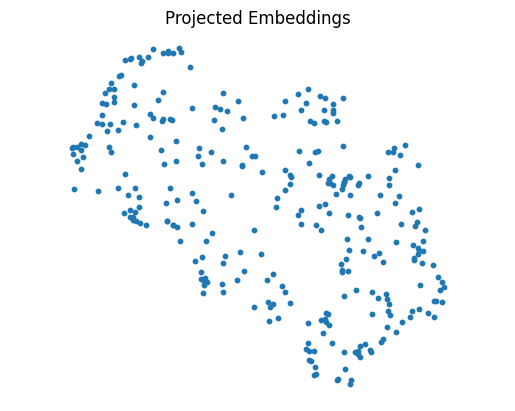

In [13]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10)
plt.gca().set_aspect('equal', 'datalim')
plt.title('Projected Embeddings')
plt.axis('off')

## Relevancy and Distraction

In [14]:
query = "What is the total revenue?"

results = chroma_collection.query(query_texts=query, n_results=5, include=['documents', 'embeddings'])

retrieved_documents = results['documents'][0]

for document in results['documents'][0]:
    print(word_wrap(document))
    print('')

Revenue Product Revenue and Service and Other Revenue Product revenue
includes sales from operating systems, cross -device productivity
applications, server applications, business solution applications,
desktop and server management tools, software development tools, video
games, and hardware such as PCs, tablets, gaming and entertainment
consoles, other intelligent devices, and related accessories. 53
Service and other revenue includes sales from cloud -based solutions
that provide customers with software, services, platforms, and content
such as Office 365, Azure, Dynamics 365, and Xbox; solution support;
and consulting services. Service and other revenue also includes sales
from online advertising and LinkedIn. Revenue Recognition Revenue is
recognized upon transfer of control of promised products or services to
customers in an amount that reflects the consideration we expect to
receive in exchange for those products or services

Revenue, classified by significant product and servic

In [15]:
query_embedding = embedding_function([query])[0]
retrieved_embeddings = results['embeddings'][0]

projected_query_embedding = project_embeddings([query_embedding], umap_transform)
projected_retrieved_embeddings = project_embeddings(retrieved_embeddings, umap_transform)


100%|██████████| 5/5 [00:00<00:00, 142.08it/s]


(np.float64(-2.481528162956238),
 np.float64(6.624906897544861),
 np.float64(3.7107146739959718),
 np.float64(11.944174432754517))

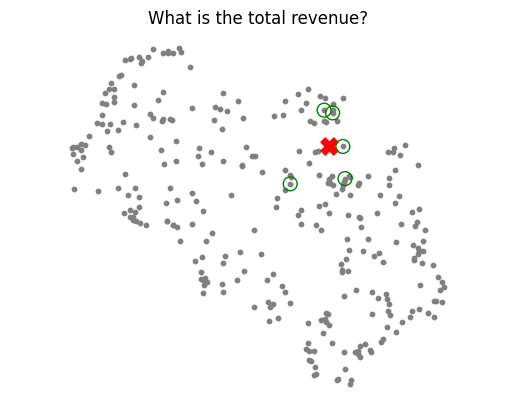

In [16]:
# Plot the projected query and retrieved documents in the embedding space
plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10, color='gray')
plt.scatter(projected_query_embedding[:, 0], projected_query_embedding[:, 1], s=150, marker='X', color='r')
plt.scatter(projected_retrieved_embeddings[:, 0], projected_retrieved_embeddings[:, 1], s=100, facecolors='none', edgecolors='g')

plt.gca().set_aspect('equal', 'datalim')
plt.title(f'{query}')
plt.axis('off')

In [17]:
query = "What is the strategy around artificial intelligence (AI) ?"
results = chroma_collection.query(query_texts=query, n_results=5, include=['documents', 'embeddings'])

retrieved_documents = results['documents'][0]

for document in results['documents'][0]:
    print(word_wrap(document))
    print('')

The ability to convert data into AI drives our competitive advantage.
Azure SQL Database makes it possible for customers to take SQL Server
from their on -premises datacenter to a fully managed instance in the
cloud to utilize built -in AI. Azure Synapse brings together data
integration, enterprise data warehousing, and big data analytics in a
comprehensive solution. We are accelerating adoption of AI innovations
from research to products. Our innovation helps every developer be an
AI developer, with approachable new tools from Azure Machine Learning
Studio for creating simple machine learning models, to the powerful
Azure Machine Learning Workbench for the most advanced AI modeling and
data science. From GitHub to Visual Studio, we provide a developer tool
chain for everyone, no matter the technical experience, across all
platforms, whether Azure, Windows, or any other cloud or client
platform

We released our Responsible AI Standard, which outlines 17 goals
aligned to our six AI prin

In [18]:
query_embedding = embedding_function([query])[0]
retrieved_embeddings = results['embeddings'][0]

projected_query_embedding = project_embeddings([query_embedding], umap_transform)
projected_retrieved_embeddings = project_embeddings(retrieved_embeddings, umap_transform)


100%|██████████| 5/5 [00:00<00:00, 230.25it/s]


(np.float64(-2.481528162956238),
 np.float64(6.624906897544861),
 np.float64(3.7107146739959718),
 np.float64(11.944174432754517))

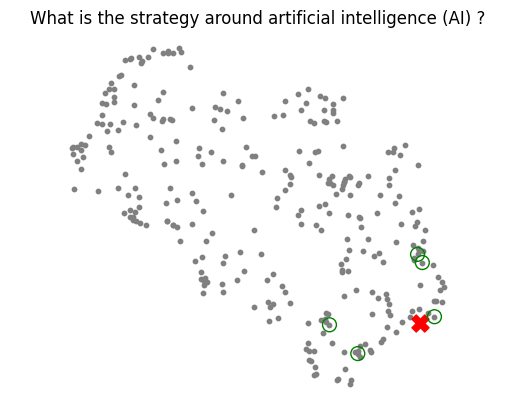

In [19]:
# Plot the projected query and retrieved documents in the embedding space
plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10, color='gray')
plt.scatter(projected_query_embedding[:, 0], projected_query_embedding[:, 1], s=150, marker='X', color='r')
plt.scatter(projected_retrieved_embeddings[:, 0], projected_retrieved_embeddings[:, 1], s=100, facecolors='none', edgecolors='g')

plt.gca().set_aspect('equal', 'datalim')
plt.title(f'{query}')
plt.axis('off')

In [20]:
query = "What has been the investment in research and development?"
results = chroma_collection.query(query_texts=query, n_results=5, include=['documents', 'embeddings'])

retrieved_documents = results['documents'][0]

for document in results['documents'][0]:
    print(word_wrap(document))
    print('')

Research and Development Research and development expenses include
payroll, employee benefits, stock -based compensation expense, and
other headcount-related expenses associated with product development.
Research and development expenses also include third-party development
and programming costs, localization costs incurred to translate
software for international markets, and the amortization of purchased
software code and services content. Such costs related to software
development are included in research and development expense until the
point that technological feasibility is reached, which for our software
products, is generally shortly before the products are released to
production. Once technological feasibility is reached, such costs are
capitalized and amortized to cost of revenue over the estimated lives
of the products

We believe our continuing research and product development are not
materially dependent on any single license or other agreement with a
third party relating 

In [21]:
query_embedding = embedding_function([query])[0]
retrieved_embeddings = results['embeddings'][0]

projected_query_embedding = project_embeddings([query_embedding], umap_transform)
projected_retrieved_embeddings = project_embeddings(retrieved_embeddings, umap_transform)


100%|██████████| 5/5 [00:00<00:00, 208.36it/s]


(np.float64(-2.481528162956238),
 np.float64(6.624906897544861),
 np.float64(3.7107146739959718),
 np.float64(11.944174432754517))

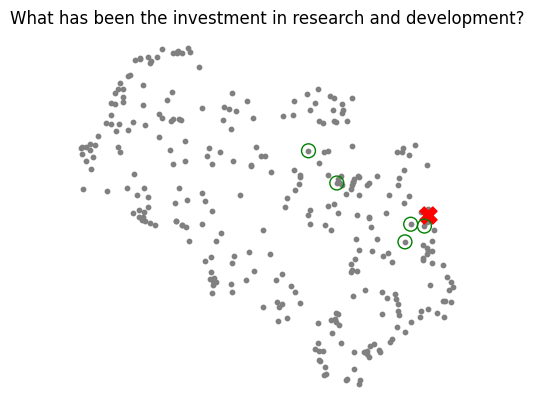

In [22]:
# Plot the projected query and retrieved documents in the embedding space
plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10, color='gray')
plt.scatter(projected_query_embedding[:, 0], projected_query_embedding[:, 1], s=150, marker='X', color='r')
plt.scatter(projected_retrieved_embeddings[:, 0], projected_retrieved_embeddings[:, 1], s=100, facecolors='none', edgecolors='g')

plt.gca().set_aspect('equal', 'datalim')
plt.title(f'{query}')
plt.axis('off')

In [23]:
query = "What has Michael Jordan done for us lately?"
results = chroma_collection.query(query_texts=query, n_results=5, include=['documents', 'embeddings'])

retrieved_documents = results['documents'][0]

for document in results['documents'][0]:
    print(word_wrap(document))
    print('')

We also increased the number of identified partners in the Black
Partner Growth Initiative and continue to invest in the partner
community through the Black Channel Partner Alliance by supporting
events focused on business growth, accelerators, and mentorship.
Progress does not undo the egregious injustices of the past or diminish
those who continue to live with inequity. We are committed to
leveraging our resources to help accelerate diversity and inclusion
across our ecosystem and to hold ourselves accountable to accelerate
change – for Microsoft, and beyond. Investing in Digital Skills The
COVID-19 pandemic led to record unemployment, disrupting livelihoods of
people around the world. After helping over 30 million people in 249
countries and territories with our global skills initiative, we
introduced a new initiative to support a more skills -based labor
market, with greater flexibility and accessible learning paths to
develop the right skills needed for the most in-demand jobs

16

In [24]:
query_embedding = embedding_function([query])[0]
retrieved_embeddings = results['embeddings'][0]

projected_query_embedding = project_embeddings([query_embedding], umap_transform)
projected_retrieved_embeddings = project_embeddings(retrieved_embeddings, umap_transform)


100%|██████████| 5/5 [00:00<00:00, 228.08it/s]


(np.float64(-2.481528162956238),
 np.float64(6.624906897544861),
 np.float64(3.7107146739959718),
 np.float64(11.944174432754517))

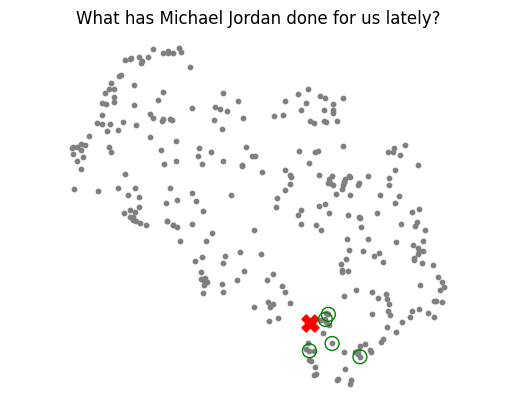

In [25]:
# Plot the projected query and retrieved documents in the embedding space
plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10, color='gray')
plt.scatter(projected_query_embedding[:, 0], projected_query_embedding[:, 1], s=150, marker='X', color='r')
plt.scatter(projected_retrieved_embeddings[:, 0], projected_retrieved_embeddings[:, 1], s=100, facecolors='none', edgecolors='g')

plt.gca().set_aspect('equal', 'datalim')
plt.title(f'{query}')
plt.axis('off')